In [ ]:
# Mount Google Drive in the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

import os
import cv2
from PIL import Image
import numpy as np
import random

In [ ]:
image_directory = '/content/drive/MyDrive/FoodClassifcation/images/'
SIZE = 150
dataset = []  #i am using the list format.
label = []  #Place holders to define add labels. I will add 1 to all food images and 0 to non_food.



In [ ]:
food_images = os.listdir(image_directory + 'food/')
for i, image_name in enumerate(food_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'food/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

#Iterate through all images in non_food folder, resize it
#Then save into the same numpy array 'dataset' but with label 1

non_food_images = os.listdir(image_directory + 'non_food/')
for i, image_name in enumerate(non_food_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'non_food/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

dataset = np.array(dataset)
label = np.array(label)

In [ ]:
print(dataset.shape)
print(label.shape)

(5053, 150, 150, 3)
(5053,)


Label for this image is:  0


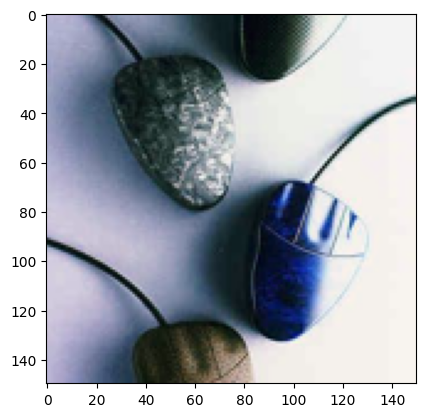

In [ ]:
#Sanity check, view few mages
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (150, 150, 3)))
print("Label for this image is: ", label[image_number])

In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [ ]:
#from keras.utils import normalize
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [ ]:
history = model.fit(X_train,
                         y_train,
                         batch_size = 32,
                         verbose = 1,
                         epochs = 50,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/50
127/127 [==============================] - 4s 28ms/step - loss: 0.0790 - accuracy: 0.9649 - val_loss: 0.3825 - val_accuracy: 0.9001
Epoch 2/50
127/127 [==============================] - 3s 21ms/step - loss: 0.0762 - accuracy: 0.9708 - val_loss: 0.4302 - val_accuracy: 0.8942
Epoch 3/50
127/127 [==============================] - 3s 21ms/step - loss: 0.0622 - accuracy: 0.9770 - val_loss: 0.3882 - val_accuracy: 0.9021
Epoch 4/50
127/127 [==============================] - 3s 23ms/step - loss: 0.0619 - accuracy: 0.9745 - val_loss: 0.3580 - val_accuracy: 0.9149
Epoch 5/50
127/127 [==============================] - 3s 23ms/step - loss: 0.0474 - accuracy: 0.9780 - val_loss: 0.4487 - val_accuracy: 0.8932
Epoch 6/50
127/127 [==============================] - 3s 21ms/step - loss: 0.0540 - accuracy: 0.9765 - val_loss: 0.4283 - val_accuracy: 0.9021
Epoch 7/50
127/127 [==============================] - 3s 20ms/step - loss: 0.0446 - accuracy: 0.9802 - val_loss: 0.4412 - val_accuracy: 0.9050

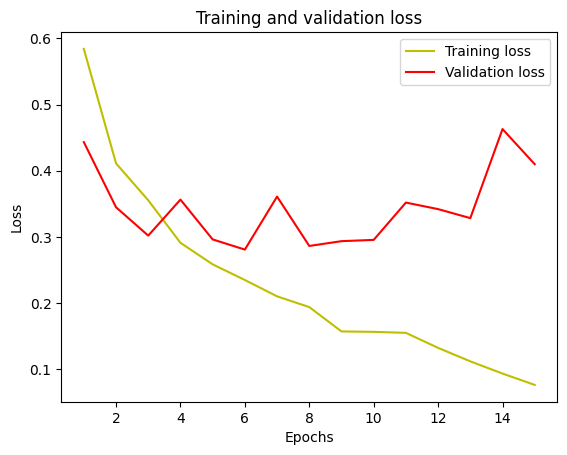

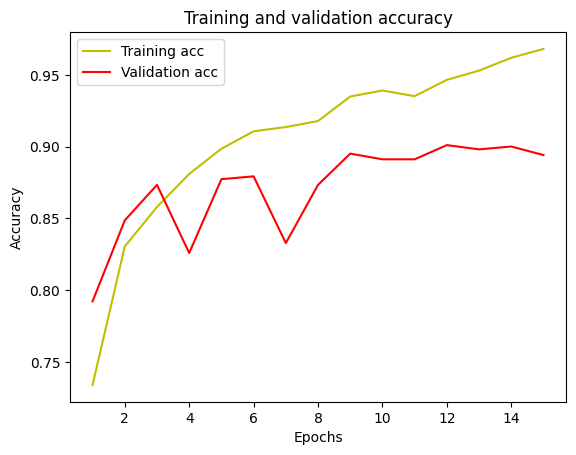

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 32ms/step
The prediction for this image is:  [[0.99993885]]
The actual label for this image is:  1


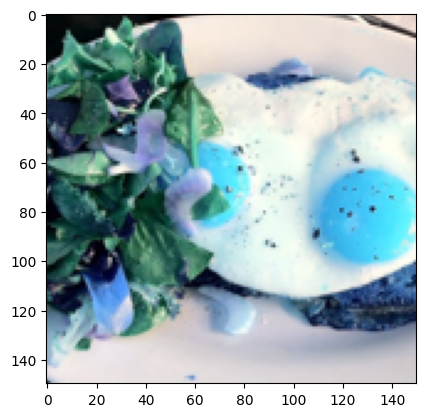

In [ ]:
#Test the model on single images
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


In [ ]:
#Instead of checking for each image, we can evaluate the model on all test data
#for accuracy
################################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

32/32 [==============================] - 1s 12ms/step - loss: 0.6621 - accuracy: 0.8991
Accuracy =  89.91097807884216 %
